In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [53]:
#PART 1.1
df = pd.read_csv("GlobalLandTemperaturesByState.csv")
df["dt"] = pd.to_datetime(df["dt"])

print("Table filtered to include only the columns for the date, temperature, and state")
dts = df[["dt", "AverageTemperature", "State"]]
dts.head()

print("Table filtered to include years after 2000")
dts = dts[dts["dt"].dt.year > 2000]

print("Table filtered to include certain states")
states = ["Wyoming", "Nebraska", "South Dakota"]
dts = dts[dts["State"].isin(states)]

# Check the final shape
print("Shape of filtered table:", dts.shape)


Table filtered to include only the columns for the date, temperature, and state
Table filtered to include years after 2000
Table filtered to include certain states
Shape of filtered table: (459, 3)


In [87]:
#PART 1.2
#average temp by date
avg = dts.groupby("dt")["AverageTemperature"].mean().reset_index()
avg.columns = ["Date", "AverageTemperature"]
print(avg.head())

        Date  AverageTemperature
0 2001-01-01           -4.480333
1 2001-02-01           -7.541000
2 2001-03-01            0.590333
3 2001-04-01            7.889000
4 2001-05-01           13.908667


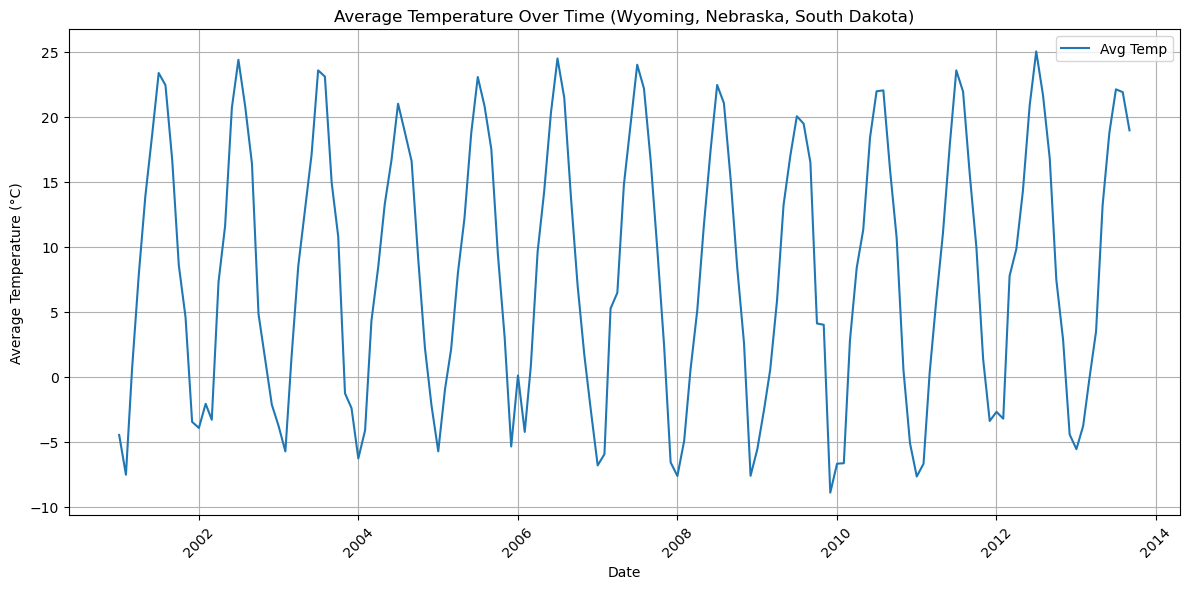

In [89]:
#PART 1.3
#Date on the x axis, average temperature on the y axis.
#Label the axis and give the graph a title
plt.figure(figsize=(12, 6))

avg["Date"] = pd.to_datetime(avg["Date"])

plt.plot(avg["Date"], avg["AverageTemperature"], label="Avg Temp")
plt.xlabel("Date")
plt.ylabel("Average Temperature (°C)")
plt.title("Average Temperature Over Time (Wyoming, Nebraska, South Dakota)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [93]:
#PART 1.4
avg["DateNumeric"] = (avg["Date"] - pd.Timestamp("1970-01-01")) // pd.Timedelta(days=1)

print(avg.head())

        Date  AverageTemperature  DateNumeric
0 2001-01-01           -4.480333        11323
1 2001-02-01           -7.541000        11354
2 2001-03-01            0.590333        11382
3 2001-04-01            7.889000        11413
4 2001-05-01           13.908667        11443


In [203]:
#PART 1.5
def sine_model(x, A, B, C, D):
    return A * np.sin(B * (x + C)) + D

x_data = np.linspace(12000, 16000, 400)
y_data = avg["AverageTemperature"]

period_guess = 100
B_guess = np.pi / period_guess  
A_guess = 15
C_guess = 0
D_guess = np.mean(y_data)
initial_guess = [A_guess, B_guess, C_guess, D_guess]


In [205]:
#PART 1.6 & 1.7
'''
params, covariance = curve_fit(sine_model, x_data, y_data, p0=initial_guess)
A, B, C, D = params

#Fitted sine curve
x_fit = np.linspace(min(x_data), max(x_data), 1000)
y_fit = sine_model(x_fit, *params)

# Plot the original data and the fitted sine curve
plt.figure(figsize=(12, 6))
plt.plot(x_data, y_data, label="Original Data", color="blue")
plt.plot(x_fit, y_fit, label="Fitted Curce", color="red")
plt.xlabel("Date (Numeric)")
plt.ylabel("Average Temperature (°C)")
plt.title("Fitted Sine to Average Temperature (WY, NB, SD)")
plt.legend()
plt.grid(True)
plt.show()
'''


'\nparams, covariance = curve_fit(sine_model, x_data, y_data, p0=initial_guess)\nA, B, C, D = params\n\n#Fitted sine curve\nx_fit = np.linspace(min(x_data), max(x_data), 1000)\ny_fit = sine_model(x_fit, *params)\n\n# Plot the original data and the fitted sine curve\nplt.figure(figsize=(12, 6))\nplt.plot(x_data, y_data, label="Original Data", color="blue")\nplt.plot(x_fit, y_fit, label="Fitted Curce", color="red")\nplt.xlabel("Date (Numeric)")\nplt.ylabel("Average Temperature (°C)")\nplt.title("Fitted Sine to Average Temperature (WY, NB, SD)")\nplt.legend()\nplt.grid(True)\nplt.show()\n'

Parameters with errors (parameter ± error):
A1 = 15.0000 ± inf
B1 = 0.0628 ± inf
C1 = 0.0000 ± inf
A2 = -0.0000 ± inf
B2 = 0.1257 ± inf
C2 = 0.0000 ± inf
D = 10.0000 ± inf
E = 0.0000 ± inf

Final equation:
y = 15.0000 * sin(0.0628 * (x + 0.0000)) + -0.0000 * sin(0.1257 * (x + 0.0000)) + 10.0000 + 0.0000 * x


/var/folders/0m/by3yd4pj7zjf7gw9vj0kcm100000gn/T/ipykernel_25819/3728851846.py:21: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covariance = curve_fit(improved_sine_model, x_data, y_data, p0=initial_guess)


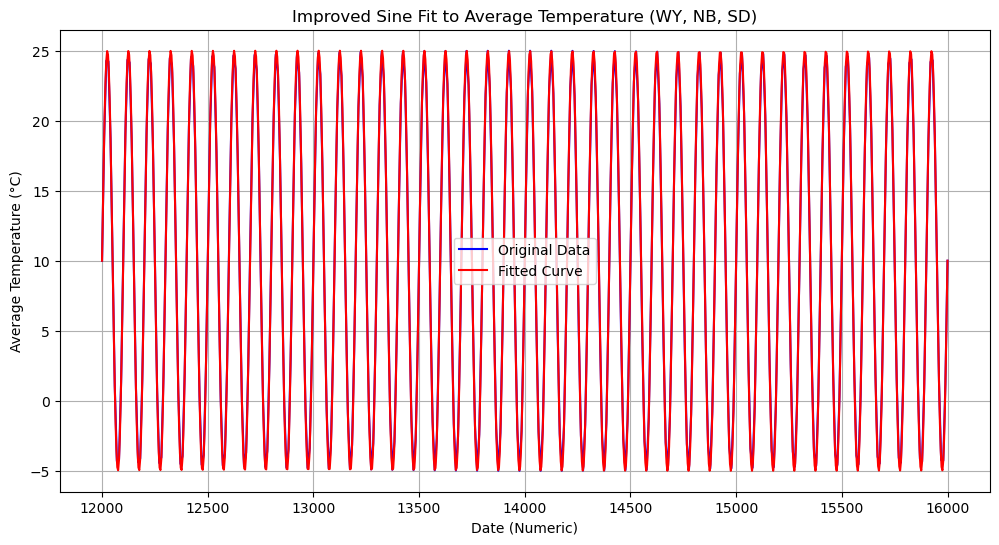

In [211]:
def improved_sine_model(x, A1, B1, C1, A2, B2, C2, D, E):
    return A1 * np.sin(B1 * (x + C1)) + A2 * np.sin(B2 * (x + C2)) + D + E * x

x_data = np.linspace(12000, 16000, 400)
y_data = 10 + 15 * np.sin(2 * np.pi * (x_data - 12000) / 100)

# Initial guesses for the parameters
period1_guess = 100
period2_guess = 50
B1_guess = 2 * np.pi / period1_guess
B2_guess = 2 * np.pi / period2_guess
A1_guess = 15
A2_guess = 5
C1_guess = 0
C2_guess = 0
D_guess = np.mean(y_data)
E_guess = 0
initial_guess = [A1_guess, B1_guess, C1_guess, A2_guess, B2_guess, C2_guess, D_guess, E_guess]

# Fit the model to the data
params, covariance = curve_fit(improved_sine_model, x_data, y_data, p0=initial_guess)
A1, B1, C1, A2, B2, C2, D, E = params

# Calculate the standard errors from the covariance matrix
errors = np.sqrt(np.diag(covariance))
A1_err, B1_err, C1_err, A2_err, B2_err, C2_err, D_err, E_err = errors

# Print each parameter with its error
param_names = ["A1", "B1", "C1", "A2", "B2", "C2", "D", "E"]
param_values = [A1, B1, C1, A2, B2, C2, D, E]
param_errors = [A1_err, B1_err, C1_err, A2_err, B2_err, C2_err, D_err, E_err]

print("Parameters with errors (parameter ± error):")
for name, value, error in zip(param_names, param_values, param_errors):
    print(f"{name} = {value:.4f} ± {error:.4f}")

# Print the final equation
print("\nFinal equation:")
print(f"y = {A1:.4f} * sin({B1:.4f} * (x + {C1:.4f})) + {A2:.4f} * sin({B2:.4f} * (x + {C2:.4f})) + {D:.4f} + {E:.4f} * x")

# Generate the fitted curve for plotting
x_fit = np.linspace(min(x_data), max(x_data), 1000)
y_fit = improved_sine_model(x_fit, *params)

# Plot the original data and the improved fitted curve
plt.figure(figsize=(12, 6))
plt.plot(x_data, y_data, label="Original Data", color="blue")
plt.plot(x_fit, y_fit, label="Fitted Curve", color="red")
plt.xlabel("Date (Numeric)")
plt.ylabel("Average Temperature (°C)")
plt.title("Improved Sine Fit to Average Temperature (WY, NB, SD)")
plt.legend()
plt.grid(True)
plt.savefig('improved_sine_fit.png')

In [ ]:
#Question 2

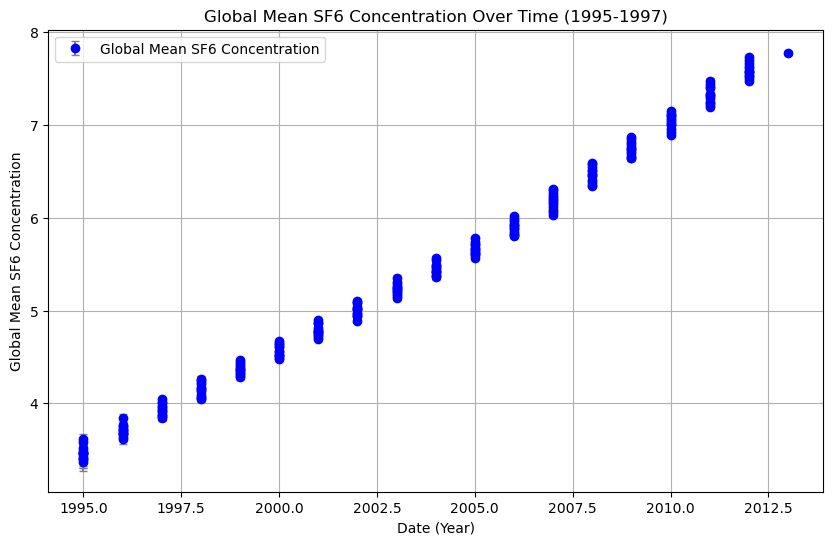

ValueError: array must not contain infs or NaNs

In [274]:
from astropy.table import Table
data = Table.read("global_SF6_MM.dat", format='ascii')
df = data.to_pandas()


# Step 3: Plot the global mean concentration with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(df['SF6ottoyr'], df['SF6ottoGLm'], yerr=df['SF6ottoGLsd'], fmt='o', color='blue', ecolor='gray', capsize=3, label='Global Mean SF6 Concentration')
plt.xlabel('Date (Year)')
plt.ylabel('Global Mean SF6 Concentration')
plt.title('Global Mean SF6 Concentration Over Time (1995-1997)')
plt.legend()
plt.grid(True)
plt.show()



def model(m, b):
    return mx + b

x_data = df['SF6ottoyr']
y_data = df['SF6ottoGLm']
y_err = df['SF6ottoGLsd']

# Initial guess for slope (m) and intercept (b)
initial_guess = [0.15, 3.0]

# Fit the model to the data, accounting for uncertainties
params, covariance = curve_fit(model, x_data, y_data, p0=initial_guess)
m, b = params
errors = np.sqrt(np.diag(covariance))
m_err, b_err = errors

# Generate points for the fitted line
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = linear_model(x_fit, *params)

# Combined plot: Data with error bars and the fitted line
plt.figure(figsize=(10, 6))
plt.errorbar(x_data, y_data, yerr=y_err, color='blue',label='Global Mean Concentration')
plt.plot(x_fit, y_fit, color='red')
plt.xlabel('Year')
plt.ylabel('Global Mean  Concentration')
plt.title('Linear Fit to Global Mean Concentration (1995-1997)')
plt.legend()
plt.grid(True)
plt.show()

# Print parameters and errors for reference
print("Fitted Parameters:")
print(f"Slope (m) = {m:.4f} ± {m_err:.4f}")
print(f"Intercept (b) = {b:.4f} ± {b_err:.4f}")